<b>Phase 3 Assignment</b><br></br>
<i>KMeans algorithm </i><br>
<b>Dataset: </b>breast cancer data from the phase 1<br>

In [35]:
#import all required libraries

%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

<b>Load and print head of dataset</b>

In [36]:
df = pd.read_csv('../data/BreastCancerWisconsin.csv') 
print(df[20:30])
df['A7'] = df['A7'].replace('?', np.NaN)
df['A7'] = pd.to_numeric(df['A7'])
df = df.fillna(df.mean(skipna=True))
print(df[20:30])

        Scn  A2  A3  A4  A5  A6  A7  A8  A9  A10  CLASS
20  1054590   7   3   2  10   5  10   5   4    4      4
21  1054593  10   5   5   3   6   7   7  10    1      4
22  1056784   3   1   1   1   2   1   2   1    1      2
23  1057013   8   4   5   1   2   ?   7   3    1      4
24  1059552   1   1   1   1   2   1   3   1    1      2
25  1065726   5   2   3   4   2   7   3   6    1      4
26  1066373   3   2   1   1   1   1   2   1    1      2
27  1066979   5   1   1   1   2   1   2   1    1      2
28  1067444   2   1   1   1   2   1   2   1    1      2
29  1070935   1   1   3   1   2   1   1   1    1      2
        Scn  A2  A3  A4  A5  A6         A7  A8  A9  A10  CLASS
20  1054590   7   3   2  10   5  10.000000   5   4    4      4
21  1054593  10   5   5   3   6   7.000000   7  10    1      4
22  1056784   3   1   1   1   2   1.000000   2   1    1      2
23  1057013   8   4   5   1   2   3.544656   7   3    1      4
24  1059552   1   1   1   1   2   1.000000   3   1    1      2
25  10

<b>Get only A2-A10 colums from Dataset</b>

In [37]:
df_attributes = df.iloc[:, 1:10]
print(df_attributes.head(10))

   A2  A3  A4  A5  A6    A7  A8  A9  A10
0   5   1   1   1   2   1.0   3   1    1
1   5   4   4   5   7  10.0   3   2    1
2   3   1   1   1   2   2.0   3   1    1
3   6   8   8   1   3   4.0   3   7    1
4   4   1   1   3   2   1.0   3   1    1
5   8  10  10   8   7  10.0   9   7    1
6   1   1   1   1   2  10.0   3   1    1
7   2   1   2   1   2   1.0   3   1    1
8   2   1   1   1   2   1.0   1   1    5
9   4   2   1   1   2   1.0   2   1    1


<b>Cluster </b><br><br> 
<b>Create KMeans model for n_cluster = 2 and iteration of 500 and initial centroids of 20<br>
Fit model to the data<br>
Calculate centroids<br>

In [38]:
model = KMeans(n_clusters=2, n_init = 20, max_iter = 500)
# fit kmeans object to data df
model.fit(df_attributes)
labels = model.predict(df_attributes)
centroids = model.cluster_centers_

<b> Below is the values for labels and the Frequency of each Value </b>

In [39]:
print(labels)
value, count = np.unique(labels, return_counts=True)
np.asarray((value, count)).T

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 0 0 1 0 

array([[  0, 466],
       [  1, 233]], dtype=int64)

<b> Below is the values for Centroids </b>

In [40]:
print(centroids)

[[3.0472103  1.30257511 1.44635193 1.34334764 2.08798283 1.38000113
  2.10515021 1.26180258 1.10944206]
 [7.15879828 6.79828326 6.72961373 5.73390558 5.472103   7.87396553
  6.10300429 6.07725322 2.54935622]]


<b> Shape of Centoids should be 2 x 9 </b>

In [41]:
print(centroids.shape)

(2, 9)


<b>DataFrame </b>

-Create a new column in your dataframe and add Kmeans labels. </br>
-Change labels values so that 0 becomes 2 and 1 becomes 4.</br>
-Print the first 15 records from your dataframe

In [42]:
#Add CLASS back to Dataframe and add Labels as a Column to the Dataframe
df_attributes = df.iloc[:,1:11]
df_attributes['labels'] = labels

# Replace values of the labels field (0 to 2; 1 to 4)

df_attributes['labels'] = df_attributes['labels'].map({0: 2, 1: 4})
print(df_attributes.head(15))

    A2  A3  A4  A5  A6    A7  A8  A9  A10  CLASS  labels
0    5   1   1   1   2   1.0   3   1    1      2       2
1    5   4   4   5   7  10.0   3   2    1      2       4
2    3   1   1   1   2   2.0   3   1    1      2       2
3    6   8   8   1   3   4.0   3   7    1      2       4
4    4   1   1   3   2   1.0   3   1    1      2       2
5    8  10  10   8   7  10.0   9   7    1      4       4
6    1   1   1   1   2  10.0   3   1    1      2       2
7    2   1   2   1   2   1.0   3   1    1      2       2
8    2   1   1   1   2   1.0   1   1    5      2       2
9    4   2   1   1   2   1.0   2   1    1      2       2
10   1   1   1   1   1   1.0   3   1    1      2       2
11   2   1   1   1   2   1.0   2   1    1      2       2
12   5   3   3   3   2   3.0   4   4    1      4       2
13   1   1   1   1   2   3.0   3   1    1      2       2
14   8   7   5  10   7   9.0   5   5    4      4       4


<b>Error Rate Function </b><br><br>
Create Error Rate Function
Print out all rates


In [43]:
def ErrorRate(label_values, class_values):

    #Create a dataframe to hold our values
    combine_df = pd.DataFrame()
    combine_df['labels'] = label_values
    combine_df['class_values'] = class_values

    b = len(combine_df[(combine_df['labels'] == 4) & (combine_df['class_values'] == 2)])
    class_2 = len(combine_df[(combine_df['labels'] == 2)])
               
    benign = b / class_2
               
    m = len(combine_df[(combine_df['labels'] == 2) & (combine_df['class_values'] == 4)])
    class_4 = len(combine_df[(combine_df['labels'] == 4)])
               
    malign = m / class_4
               
               
    t = len(combine_df[(combine_df['labels']) != (combine_df['class_values'])])
    total_records = len(combine_df)
    
    total_error = t / total_records
               
    return benign, malign, total_error
                         
    
#Create label values and class values to pass into function    
label_values = df_attributes['labels']
class_values = df_attributes['CLASS']

benign, malign, total_error = ErrorRate(label_values, class_values)
print("Error Rate for Benign:", benign) 
print("Error Rate for Malign:", malign)
print("Total Error Rate:", total_error)

Error Rate for Benign: 0.023605150214592276
Error Rate for Malign: 0.0815450643776824
Total Error Rate: 0.04291845493562232


<b>Density Curve for "CLASS" and "labels"</b>

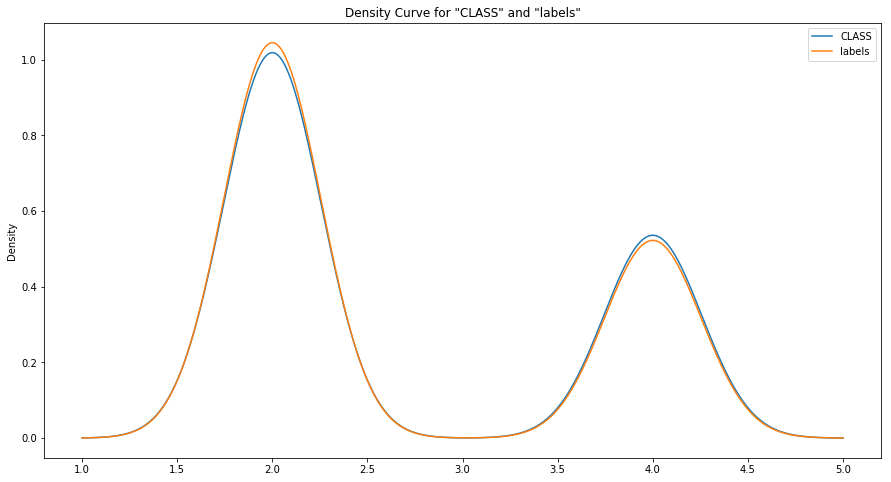

In [44]:
from pandas.plotting import scatter_matrix
df_curve=df_attributes.iloc[:, 9:11]

ax = df_curve.plot.kde(figsize=(15,8))
plt.title('Density Curve for "CLASS" and "labels"')
plt.show()

<b>Report Statement:</b>

The model we constructed resulted in small benign, malign, and total error rates. Additionally, when comparing the density curve of the two variables, “CLASS” and “Labels”, we find that they looked identical. Lastly, the two variables have very similar standard deviations and distributions, also shown by the box plot (Given reference below from phase-2). With this analysis we can determine that the model is accurate and results in a valid analysis.<br>

We would need to evaluate the level of acceptable accuracy. We might find that although the model accurate it does not meet the level of accuracy we need. We could understand its accuracy level by comparing the performance of other similar models. We might find a more accurate or acceptable model by changing model parameters or creating a different model. Data science experience and testing the model with data overtime would also help us understand its level of accuracy. However, practically speaking, the model would be acceptable.

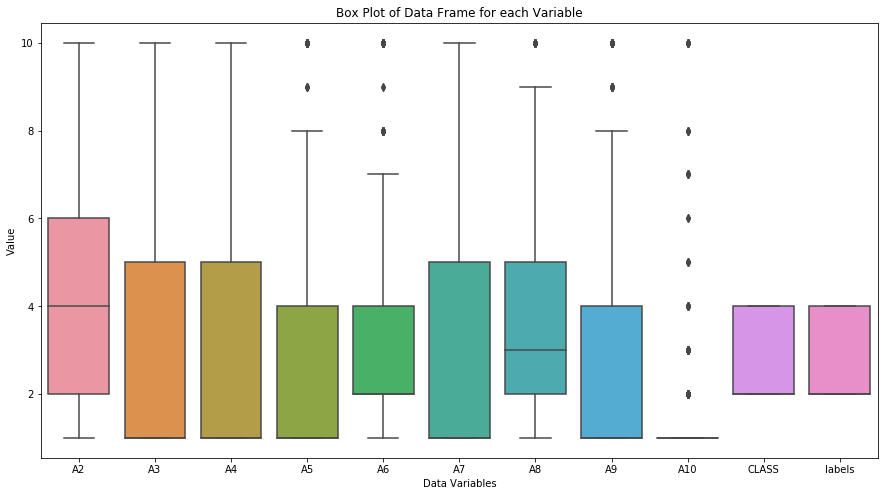

In [45]:
#Create a box plot of the dataframe
import seaborn as sns
plt.figure(figsize=(15,8))
ax=sns.boxplot(x="variable", y="value", data=pd.melt(df_attributes))
plt.title('Box Plot of Data Frame for each Variable')
plt.xlabel('Data Variables')
plt.ylabel('Value')
plt.show()